## Демо

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import torch
import torchaudio
from IPython import display
from IPython.display import clear_output
from sklearn.metrics import confusion_matrix
from torch import nn
from torch.utils.data import DataLoader, Dataset, Subset

%matplotlib inline

#device = "cuda:0"

In [3]:

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_true = [0,1,0,1,0]
y_pred_proba = [0.92, 0.7, 0.6, 0.45, 0.3]


auc_score = roc_auc_score(y_true, y_pred_proba)
print(f"ROC-AUC: {auc_score:.3f}")

ROC-AUC: 0.500


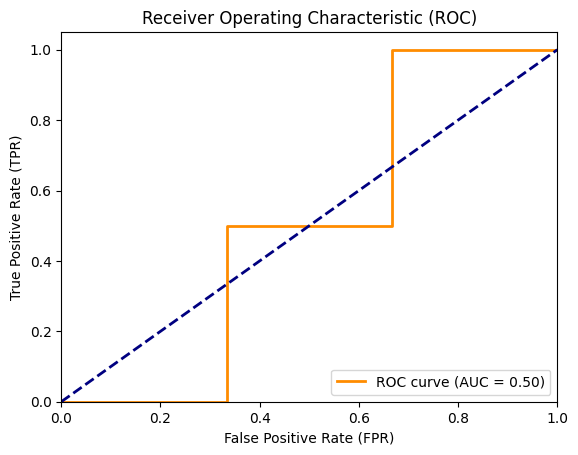

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Вычисление FPR, TPR и порогов
y_true = [0,1,0,1,0]
y_scores = [0.92, 0.7, 0.6, 0.45, 0.3]
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [4]:
import numpy as np

def gini_impurity(counts):
    total = sum(counts)
    if total == 0:
        return 0
    proportions = np.array(counts) / total
    return sum(proportions * (1 - proportions))

# Исходная вершина
R = [40, 60]  # [class1, class0]
H_R = gini_impurity(R)

# Левая вершина после разбиения
Rl = [20, 50]
H_Rl = gini_impurity(Rl)

# Правая вершина после разбиения
Rr = [20, 10]  # остальные объекты: 40-20=20 class1, 60-50=10 class0
H_Rr = gini_impurity(Rr)

# Вычисляем Information Gain
total_R = sum(R)
weight_Rl = sum(Rl) / total_R
weight_Rr = sum(Rr) / total_R

IG = H_R - (weight_Rl * H_Rl + weight_Rr * H_Rr)

# Округляем до сотых
IG_rounded = round(IG, 2)

print(f"Information Gain (IG): {IG_rounded}")

Information Gain (IG): 0.06


In [6]:
import numpy as np

# Исходные данные
data = np.array([
    [3, 10],
    [2, 5],
    [5, 15],
    [6, 14]
])

# Функция для вычисления несмещённой дисперсии
def unbiased_variance(y):
    if len(y) <= 1:
        return 0  # Если подгруппа содержит 0 или 1 элемент, дисперсия = 0
    return np.var(y, ddof=1)  # ddof=1 для несмещённой оценки

# Разбиваем данные по условию x > 5
left_mask = data[:, 0] <= 5
right_mask = data[:, 0] > 5

R = data[:, 1]  # Все y
Rl = data[left_mask, 1]  # y для x <= 5
Rr = data[right_mask, 1]  # y для x > 5

# Вычисляем дисперсии
H_R = unbiased_variance(R)
H_Rl = unbiased_variance(Rl)
H_Rr = unbiased_variance(Rr)

# Вычисляем Information Gain
IG = H_R - (len(Rl)/len(R) * H_Rl + len(Rr)/len(R) * H_Rr)

# Округляем до десятых
IG_rounded = round(IG, 1)

print(f"Information Gain (IG): {IG_rounded}")

Information Gain (IG): 1.9


Если все объекты одного класса (например, 100 объектов класса 1 и 0 класса 0), то энтропия будет 0 (нет неопределенности).

Если классы распределены равномерно (50 класса 1 и 50 класса 0), энтропия будет 1 (максимальная неопределенность).

В нашем примере (40 класса 1 и 60 класса 0) энтропия ≈ 0.971, что близко к максимуму.

In [ ]:
import numpy as np

n_class1 = 40
n_class0 = 60
total = n_class1 + n_class0

p1 = n_class1 / total  # 0.4
p0 = n_class0 / total  # 0.6

def entropy(probabilities):
    return -np.sum(probabilities * np.log2(probabilities + 1e-10))  # +1e-10 чтобы избежать log(0)

probs = np.array([p1, p0])
H = entropy(probs)

print(f"Энтропия: {H:.4f}")

In [5]:
import numpy as np

def kernel(a, b):
    """Вычисляет ядро K(a, b) = exp(-||a - b||^2)."""
    return np.exp(-np.sum((a - b) ** 2))

# Заданные векторы
a = np.array([1, 1, 1])
b = np.array([1, 2, 0])

# Вычисляем K(a, b), K(a, a) и K(b, b)
K_ab = kernel(a, b)
K_aa = kernel(a, a)
K_bb = kernel(b, b)

# Косинус угла в новом пространстве
cos_theta = K_ab / np.sqrt(K_aa * K_bb)

# Округляем до сотых
cos_theta_rounded = np.round(cos_theta, 2)

print(f"Косинус угла между векторами a и b: {cos_theta_rounded}")

Косинус угла между векторами a и b: 0.14


In [7]:
import numpy as np

# Заданные векторы
a = np.array([1, 2, 3, 2, 4])    # "бутерброд с колбасой"
b = np.array([0.5, 2, 2.5, 2, 4]) # "бутерброд без колбасы"
c = np.array([5, 2, 2, 3, 4])     # "бутерброд с сыром"

# Вычисляем разницу между "с колбасой" и "без колбасы"
d = a - b

# Получаем вектор для "бутерброд без сыра"
c_without_cheese = c - d

# Вычисляем квадрат евклидовой нормы
squared_norm = np.sum(c_without_cheese ** 2)

print(f"Вектор 'бутерброд без сыра': {c_without_cheese}")
print(f"Квадрат длины вектора: {squared_norm}")

Вектор 'бутерброд без сыра': [4.5 2.  1.5 3.  4. ]
Квадрат длины вектора: 51.5


In [ ]:
import numpy as np

w = np.array([2, 3])
w0 = 7

# Норма вектора w
w_norm = np.linalg.norm(w)

# Ширина полосы
width = 2 / w_norm

print(f"Ширина полосы: {width:.4f}")  # 0.5547
print(f"Округлённо: {width:.2f}")      # 0.55

In [ ]:
import numpy as np

def vector_operations_example():
    # Создаем векторы
    w = np.array([2, 3])
    x1 = np.array([1, 1])  # Пример произвольного вектора x

    # 1. Скалярное произведение
    dot_product = np.dot(w, x1)
    print(f"Скалярное произведение w и x1: {dot_product}")

    # 2. Норма (длина) вектора
    norm_w = np.linalg.norm(w)
    print(f"Длина вектора w: {norm_w:.4f}")

    # 3. Расстояние между гиперплоскостями (из вашей задачи)
    w0 = 7
    distance = 2 / norm_w  # для |<w,x>|=w0±1
    print(f"Ширина полосы между гиперплоскостями: {distance:.4f} (округляем до 0.55)")

    # 4. Угол между векторами (косинус угла)
    x2 = np.array([-1, 2])
    cos_theta = np.dot(w, x2) / (np.linalg.norm(w) * np.linalg.norm(x2))
    print(f"Косинус угла между w и x2: {cos_theta:.4f}")

    # 5. Проекция вектора
    projection = (np.dot(w, x1) / np.dot(w, w)) * w
    print(f"Проекция x1 на w: {projection}")

if __name__ == "__main__":
    vector_operations_example()

In [ ]:
import numpy as np

# Исходные данные
X = np.array([
    [1, 100, 10],
    [1, 150, 5],
    [1, 120, 8],
    [1, 200, 3]
])
y = np.array([500, 700, 600, 950])

# Вычисляем X^T X
XT_X = np.dot(X.T, X)

# Вычисляем ранг матрицы X^T X
rank = np.linalg.matrix_rank(XT_X)

print(f"Матрица X^T X:\n{XT_X}")
print(f"Ранг матрицы X^T X: {rank}")

- Истинные значения целевой переменной в листе: \( y = [4, 8, 5, 6, 7] \)
- Функция потерь:
  \[
  L(v) = \sum_{i=1}^{n} (y_i - v)^2 + \lambda v^2
  \]
- Коэффициент регуляризации: \( \lambda = 2 \)

**Решение:**
1. **Раскроем сумму квадратов:**
   \[
   L(v) = (4-v)^2 + (8-v)^2 + (5-v)^2 + (6-v)^2 + (7-v)^2 + 2v^2
   \]

2. **Упростим выражение:**
   \[
   L(v) = (16 - 8v + v^2) + (64 - 16v + v^2) + (25 - 10v + v^2) + (36 - 12v + v^2) + (49 - 14v + v^2) + 2v^2
   \]
   \[
   L(v) = 190 - 60v + 7v^2
   \]

3. **Найдем минимум функции \( L(v) \):**
   - Продифференцируем \( L(v) \) по \( v \):
     \[
     \frac{dL}{dv} = -60 + 14v
     \]
   - Приравняем производную к нулю:
     \[
     -60 + 14v = 0 \implies v = \frac{60}{14} \approx 4.2857
     \]

4. **Округлим до сотых:**
   \[
   v \approx 4.29
   \]


In [ ]:
df_train = pd.read_csv("/content/Data_train.csv")
df_test = pd.read_csv("/content/Data_test.csv")

In [ ]:
df_train.head()

,type,group,education,meal,preparation course,score-1,score-2,score-3
0,wild,group B,some high school,standard,completed,63,67,67
1,domestic,group C,bachelor's degree,standard,none,67,69,75
2,domestic,group C,some college,standard,completed,69,90,88
3,domestic,group B,some high school,standard,none,62,64,66
4,wild,group E,some college,reduced,none,93,90,83


In [ ]:
df_test.head()

,type,group,education,meal,preparation course
0,wild,group D,some college,standard,none
1,wild,group C,master's degree,reduced,completed
2,wild,group B,some college,reduced,completed
3,wild,group A,associate's degree,reduced,none
4,domestic,group B,some college,standard,completed


In [ ]:
df_train.isna().sum()

,0
type,0
group,20
education,0
meal,0
preparation course,0
score-1,0
score-2,0
score-3,0


In [ ]:
df_test["group"].unique(), df_train["group"].unique()

(array(['group D', 'group C', 'group B', 'group A', 'group E', nan],
       dtype=object),
 array(['group B', 'group C', 'group E', 'group D', 'group A', nan],
       dtype=object))

In [ ]:
df_train["group"] = df_train["group"].fillna("group F")
df_test["group"] = df_test["group"].fillna("group F")

In [ ]:
def pass_condition(row):
    return int((row['score-1'] > 50) & (row['score-2'] > 50) & (row['score-3'] > 50))

df_train["pass"] = df_train.apply(pass_condition, axis=1)

In [ ]:
df_train["pass"].value_counts()

,count
pass,
1,555
0,145


In [ ]:
train_wild = df_train[df_train['type']=="wild"]
train_wild["pass"].value_counts()

,count
pass,
1,268
0,75


In [ ]:
268/(75+268)

0.7813411078717201

In [ ]:
train_domestic = df_train[df_train['type']=="domestic"]
train_domestic["pass"].value_counts()

,count
pass,
1,287
0,70


In [ ]:
287/(287+70)

0.803921568627451

In [ ]:
abs(287/(287+70)-268/(75+268))

0.022580460755730947

In [ ]:
df_train[df_train["education"]=="high school"]["pass"].value_counts()

,count
pass,
1,99
0,35


In [ ]:
df_train["preparation course"].unique()

array(['completed', 'none'], dtype=object)

In [ ]:
train_wild[train_wild["preparation course"]=="none"]["pass"].value_counts()

,count
pass,
1,152
0,60


In [ ]:
df_train['score-1'].median()

66.0

In [ ]:
df_train['score-3'].quantile(q=0.25, "lower")-df_train['score-3'].quantile(q=0.75)

np.float64(-21.0)

In [ ]:
df_train_encoded = pd.get_dummies(df_train, columns=df_train.dtypes[df_train.dtypes==object].keys(), drop_first=True)
df_test_encoded = pd.get_dummies(df_test, columns=df_test.dtypes[df_test.dtypes==object].keys(), drop_first=True)

In [ ]:
len(df_train_encoded.columns), len(df_test_encoded)

(17, 300)

In [ ]:
df_train_encoded = df_train_encoded.astype(int)

In [ ]:
df_test_encoded = df_test_encoded.astype(int)

In [ ]:
y = df_train["pass"]
X = df_train_encoded.astype(int).drop(columns=['pass'])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import cross_val_score

In [ ]:
clf = DecisionTreeClassifier(max_depth=5, criterion='entropy').fit(X, y)

In [ ]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(max_depth=5, criterion='entropy')
scores = cross_val_score(clf, X, y, cv=3, scoring='roc_auc')
print("%0.1f accuracy with a standard deviation of %0.1f" % (scores.mean(), scores.std()))

1.0 accuracy with a standard deviation of 0.0


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':range(2,21)}
dt = DecisionTreeClassifier(criterion='entropy')
clf = GridSearchCV(dt, parameters, cv=3, scoring='roc_auc')
clf.fit(X, y)

best_max_depth = clf.best_params_['max_depth']
best_max_depth

4

In [ ]:
def get_cat_bio(row):
    return f"({row['type']}, {row['type']})"

df_train["cat_bio"] = df_train.apply(get_cat_bio, axis=1)
df_test["cat_bio"] = df_test.apply(get_cat_bio, axis=1)

In [ ]:
df_train

,type,group,education,meal,preparation course,score-1,score-2,score-3,pass,cat_bio
0,wild,group B,some high school,standard,completed,63,67,67,1,"(wild, wild)"
1,domestic,group C,bachelor's degree,standard,none,67,69,75,1,"(domestic, domestic)"
2,domestic,group C,some college,standard,completed,69,90,88,1,"(domestic, domestic)"
3,domestic,group B,some high school,standard,none,62,64,66,1,"(domestic, domestic)"
4,wild,group E,some college,reduced,none,93,90,83,1,"(wild, wild)"
...,...,...,...,...,...,...,...,...,...,...
695,wild,group C,some high school,standard,completed,67,73,68,1,"(wild, wild)"
696,domestic,group B,high school,reduced,none,8,24,23,0,"(domestic, domestic)"
697,wild,group E,some college,standard,completed,85,75,68,1,"(wild, wild)"
698,wild,group E,associate's degree,standard,none,53,45,40,0,"(wild, wild)"


In [ ]:
X = df_train[["cat_bio", "education", "meal", "preparation course"]]
X_test = df_test[["cat_bio", "education", "meal", "preparation course"]]

In [ ]:
X = pd.get_dummies(X, columns=X.dtypes[X.dtypes==object].keys(), drop_first=True)
X = X.astype(int)

X_test = pd.get_dummies(X_test, columns=X_test.dtypes[X_test.dtypes==object].keys(), drop_first=True)
X_test = X_test.astype(int)

In [ ]:
clf = DecisionTreeClassifier(max_depth=5, criterion='entropy').fit(X, y)

In [ ]:
probs = clf.predict(X_test)

# Вычисляем значение ROC-AUC
roc_auc = round(roc_auc_score(y_test, probs), 2)
print(f"Roc-AUC score: {roc_auc}")

NameError: name 'y_test' is not defined

# Вариант 1

In [ ]:
df_train = pd.read_csv("/content/TrainData.csv")
df_test = pd.read_csv("/content/TestData.csv")

In [ ]:
df_train.isnull().sum()

,0
0,0
1,5
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
df_train['1'].mean()

np.float64(31.28322514908239)

In [ ]:
df_train['1'] = df_train['1'].fillna(df_train['1'].mean())

In [ ]:
df_train['13']

,13
0,135.0
1,1001.0
2,1.0
3,16.0
4,68.0
...,...
508,247.0
509,501.0
510,1.0
511,1.0


In [ ]:
df_train = df_train.dropna()

In [ ]:
df_train.target.value_counts()

,count
target,
Not churn,276
Churn,232
Chorn,1
Not chorn,1


In [ ]:
df_train.target = df_train.target.replace('Chorn', "Churn").replace('Not chorn', "Not churn")

In [ ]:
df_train.target = df_train.target.replace('Not churn',0).replace('Churn',1)

<ipython-input-17-652e16f9d26d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train.target = df_train.target.replace('Not churn',0).replace('Churn',1)


In [ ]:
X_train = df_train.drop("target", axis=1)

In [ ]:
X_train.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13'],
      dtype='object')

In [ ]:
s = 0
for i in X_train.columns:
    if len(X_train[f"{i}"].unique()) < 5:
        s +=1
s

6

In [ ]:
df_train[["7", "target"]]

,7,target
0,A,1
1,B,0
2,A,1
3,A,1
4,B,0
...,...,...
508,B,0
509,A,1
510,A,1
511,A,1


In [ ]:
(df_train["2"]>df_train["2"].mean()) & (df_train["13"]<df_train["13"].median())

,0
0,False
1,False
2,True
3,False
4,False
...,...
508,False
509,False
510,True
511,False


In [ ]:
tmp = df_train[(df_train["2"]>df_train["2"].mean()) & (df_train["13"]<df_train["13"].median())]

In [ ]:
tmp["target"].mean()

np.float64(0.5056179775280899)

In [ ]:
45/(45+44)

0.5056179775280899

In [ ]:
tmp.mean()

np.float64(0.5056179775280899)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train["7"] = le.fit_transform(df_train["7"])

In [ ]:
df_train["7"] = df_train["7"].replace("A", 1).replace("B", 0)

<ipython-input-21-0bcfe1660f03>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train["7"] = df_train["7"].replace("A", 1).replace("B", 0)


In [ ]:
df_train.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
0,1.000000,0.060355,-0.025785,-0.080933,-0.037662,0.057068,0.114514,-0.014552,-0.100440,0.015802,0.021650,-0.069946,0.049324,-0.024011,0.002205
1,0.060355,1.000000,0.208128,0.117217,-0.110280,0.049470,0.365135,-0.199069,0.093323,0.164922,0.039525,0.042374,-0.103528,0.080626,0.134423
2,-0.025785,0.208128,1.000000,0.084453,0.067059,0.118559,0.307772,-0.281101,0.214150,0.307833,-0.012715,0.075142,-0.228701,0.025319,0.235356
3,-0.080933,0.117217,0.084453,1.000000,0.116146,0.075686,0.098971,-0.162529,0.186963,0.114268,-0.022807,-0.010870,-0.026698,0.068965,0.195196
4,-0.037662,-0.110280,0.067059,0.116146,1.000000,0.397585,0.160295,-0.299730,0.210317,0.131898,0.038853,0.044263,0.073154,0.113586,0.361948
5,0.057068,0.049470,0.118559,0.075686,0.397585,1.000000,0.241687,-0.241128,0.057506,0.093464,0.114035,0.039108,0.033308,0.033435,0.236240
6,0.114514,0.365135,0.307772,0.098971,0.160295,0.241687,1.000000,-0.350936,0.252173,0.357088,0.153543,-0.000168,-0.111287,0.098151,0.338649
7,-0.014552,-0.199069,-0.281101,-0.162529,-0.299730,-0.241128,-0.350936,1.000000,-0.433168,-0.368253,-0.127197,-0.027685,0.058814,-0.165116,-0.712986
8,-0.100440,0.093323,0.214150,0.186963,0.210317,0.057506,0.252173,-0.433168,1.000000,0.550849,0.045526,0.203288,-0.041990,0.141921,0.444122
9,0.015802,0.164922,0.307833,0.114268,0.131898,0.093464,0.357088,-0.368253,0.550849,1.000000,0.020953,0.111981,-0.135562,0.104265,0.387345


In [ ]:
df_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,32.08,4.000,1,13,4,1.500,B,0,0,1,2,120,1
1,0,23.50,1.500,2,9,4,0.875,B,0,0,1,2,160,1
2,0,33.25,2.500,1,8,4,2.500,B,0,0,1,2,0,3
3,1,74.83,19.000,1,1,1,0.040,B,1,2,0,2,0,352
4,1,20.17,5.625,2,9,4,1.710,A,0,0,0,1,120,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,1,32.67,5.500,2,11,8,5.500,A,1,12,1,2,408,1001
169,1,65.42,11.000,2,10,9,20.000,A,1,7,1,2,22,1
170,0,27.33,1.665,2,1,1,0.000,B,0,0,0,2,340,2
171,1,24.83,2.750,2,8,4,2.250,A,1,6,0,2,184,601


In [ ]:
y = df_train["target"]
X_train = df_train.drop("target", axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf = LogisticRegression(random_state = 42,penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None).fit(X_train, y)
scores = cross_val_score(clf, X_train, y, cv=3, scoring='f1')
scores.mean()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'mul

np.float64(0.7683967660545786)

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
clf = GridSearchCV(LogisticRegression(random_state = 42,penalty='l2', dual=False, tol=0.0001, fit_intercept=True, intercept_scaling=1, class_weight=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None), parameters, scoring="f1_macro", cv=3)
clf.fit(X_train, y)

clf.best_params_

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'mul

{'C': 10}

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,NEW
0,1,34.750000,15.00,2,12,7,5.375,1,1,9,1,2,0,135.0,2
1,1,19.170000,4.00,1,3,4,1.000,0,0,0,1,2,360,1001.0,0
2,1,20.250000,9.96,2,10,2,0.000,1,0,0,0,2,0,1.0,2
3,1,31.283225,28.00,1,8,4,28.500,1,1,40,0,2,0,16.0,2
4,1,22.580000,1.50,1,6,4,0.540,0,0,0,1,2,120,68.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,0,37.330000,2.50,2,3,8,0.210,0,0,0,0,2,260,247.0,0
509,0,24.750000,3.00,2,11,8,1.835,1,1,19,0,2,0,501.0,2
510,1,31.315675,8.50,2,10,8,7.000,1,1,3,0,2,0,1.0,2
511,1,31.315675,3.00,2,11,8,6.000,1,1,11,0,2,80,1.0,2


In [ ]:
X_train["NEW"]=X_train["7"]*X_train["11"]

parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
clf = GridSearchCV(LogisticRegression(random_state=42, penalty='l2', dual=False, tol=0.0001, fit_intercept=True, intercept_scaling=1, class_weight=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None), scoring="f1", param_grid=parameters, cv=3)
clf.fit(X_train, y)

clf.best_params_

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'mul

{'C': 1}

In [ ]:
clf.best_score_

np.float64(0.8488612836438924)

In [ ]:
df_test["7"] = le.fit_transform(df_test["7"])
df_test["NEW"]=df_test["7"]*df_test["11"]

In [ ]:
result = clf.predict(df_test)

In [ ]:
from lightgbm import LGBMRegressor


parameters = {
    'max_depth' : [4, 6, 8],
    'learning_rate' : [0.01, 0.05, 0.1],
    'n_estimators' : [100, 150, 200],
    'num_leaves': [20, 50, 100],
    'reg_alpha': [0.0, 0.1, 0.5]
}

lgbmr = LGBMRegressor()
grid_search = GridSearchCV(estimator=lgbmr, param_grid=parameters, cv=3, n_jobs=-1)
grid_search.fit(X_train, y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 526
[LightGBM] [Info] Number of data points in the train set: 510, number of used features: 15
[LightGBM] [Info] Start training from score 0.456863
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [100, 150, 200],
                         'num_leaves': [20, 50, 100],
                         'reg_alpha': [0.0, 0.1, 0.5]})

In [ ]:
best_lgbmr = LGBMRegressor(**grid_search.best_params_)
best_lgbmr.fit(X_train, y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 526
[LightGBM] [Info] Number of data points in the train set: 510, number of used features: 15
[LightGBM] [Info] Start training from score 0.456863
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

LGBMRegressor(learning_rate=0.05, max_depth=4, num_leaves=20, reg_alpha=0.1)

In [ ]:
pred_y_lgbmr = best_lgbmr.predict(df_test)

In [ ]:
test_preds = [1 if pred > 0.5 else 0 for pred in pred_y_lgbmr]

In [ ]:
pd.DataFrame(test_preds).to_csv('result1.csv', index = False)

# Демо 2

eigenvalues [2. 3.]
eigenvector [ 0.89442719 -0.4472136 ]


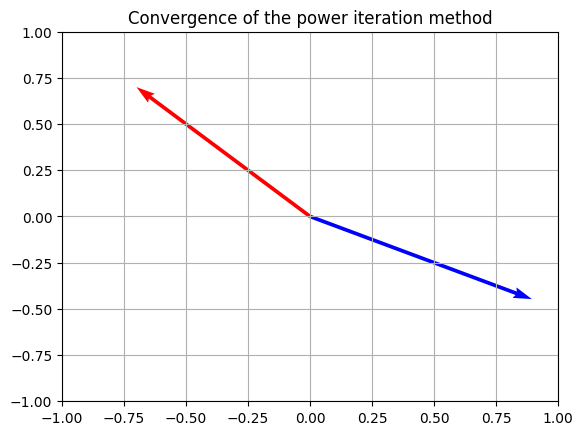

lamda =  4.499999999999999
X =  [-0.7  0.7]


In [ ]:
import numpy as np
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from numpy import linalg as LA

# given matrix
A = np.array([[-1, -6], [2, 6]])

eigenvalues, eigenvectors = LA.eig(A)
# an eigenvector corresponding to the max eigenvalue
eigenvector = -eigenvectors[:,0]

print("eigenvalues", eigenvalues)
print("eigenvector",eigenvector)

k = 10
X_origin = [0, 0]
Y_origin = [0, 0]

# Starting vector
#X = np.random.rand(A.shape[0])
# initial guess vector
X = np.array([-0.7, 0.7])

fig, ax = plt.subplots()
plt.title("Convergence of the power iteration method")
plt.grid()
plt.xlim(-1, 1)
plt.ylim(-1, 1)
U = [eigenvector[0], X[0]]
V = [eigenvector[1], X[1]]

q = ax.quiver(X_origin, Y_origin, U, V, color=['b', 'r'], angles='xy', scale_units='xy', scale=1)

def animate(i):
    # Power it
    global X
    if i:
        X = np.matmul(A, X)
        # Normalize it
        X = X / np.linalg.norm(X, ord=2)

    U = [eigenvector[0], X[0]]
    V = [eigenvector[1], X[1]]
    q.set_UVC(U, V)

ani = FuncAnimation(fig, animate, frames=k, repeat=False, interval=1000)

plt.show()

l = np.dot(np.matmul(A, X), X) / np.dot(X, X)

print("lamda = ", l)
print("X = ", X)

# Вариант 2

In [ ]:
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")

In [ ]:
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1057,1,2.7,0,3,1,41,0.1,97,4,...,397,891,2033,16,9,2,1,Yes,0,1
1,1619,1,1.9,0,2,1,21,0.4,138,1,...,46,562,1641,7,2,13,1,No,0,1
2,1028,1,2.8,0,1,1,30,0.1,193,1,...,1801,1923,1424,18,4,13,1,No,1,1
3,1994,1,0.8,1,2,1,7,0.6,88,8,...,667,711,454,11,8,6,1,Yes,0,0
4,1603,1,0.5,1,1,1,17,0.5,114,2,...,430,1207,1637,17,3,11,1,No,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1742,1,1.6,0,3,0,49,0.8,100,1,...,1134,1469,1947,5,4,6,1,No,1,2
1496,1936,0,1.3,0,2,0,44,0.1,139,3,...,570,1021,1400,17,7,3,0,No,1,1
1497,1567,0,0.5,1,3,0,22,0.5,119,6,...,545,1621,2312,9,1,18,1,No,0,2
1498,1456,0,1.6,1,9,1,39,0.1,80,8,...,815,1666,3998,6,3,13,1,Yes,0,3


In [ ]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,wifi,price_range
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,1228.148000,0.496000,1.529467,0.512000,4.164000,0.517333,32.426667,0.49540,139.913333,4.486667,9.704667,642.044667,1250.533333,2130.934667,12.255333,5.788667,11.014000,0.762000,0.510667,1.500000
std,439.785748,0.500151,0.811400,0.500023,4.291237,0.499866,18.145048,0.28907,35.425845,2.298117,6.059972,441.994736,432.460692,1085.674395,4.216554,4.336420,5.473126,0.426001,0.500053,1.117213
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.10000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,840.000000,0.000000,0.700000,0.000000,0.750000,0.000000,16.000000,0.20000,108.000000,2.000000,4.000000,277.750000,874.000000,1213.750000,9.000000,2.000000,6.000000,1.000000,0.000000,1.000000
50%,1204.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.50000,140.000000,4.000000,10.000000,559.000000,1239.500000,2167.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.500000
75%,1606.250000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.70000,170.000000,7.000000,15.000000,942.750000,1626.750000,3088.750000,16.000000,9.000000,16.000000,1.000000,1.000000,2.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.00000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,3.000000


In [ ]:
df_train["is_internet"] = ~((df_train["wifi"] == 0) & (df_train["three_g"] == 0) &  (df_train["four_g"] == 0))
df_train["is_internet"] = df_train["is_internet"].astype(int)

df_test["is_internet"] = ~((df_train["wifi"] == 0) & (df_train["three_g"] == 0) &  (df_train["four_g"] == 0))
df_test["is_internet"] = df_test["is_internet"].astype(int)

df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,is_internet
0,1057,1,2.7,0,3,1,41,0.1,97,4,...,891,2033,16,9,2,1,Yes,0,1,1
1,1619,1,1.9,0,2,1,21,0.4,138,1,...,562,1641,7,2,13,1,No,0,1,1
2,1028,1,2.8,0,1,1,30,0.1,193,1,...,1923,1424,18,4,13,1,No,1,1,1
3,1994,1,0.8,1,2,1,7,0.6,88,8,...,711,454,11,8,6,1,Yes,0,0,1
4,1603,1,0.5,1,1,1,17,0.5,114,2,...,1207,1637,17,3,11,1,No,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1742,1,1.6,0,3,0,49,0.8,100,1,...,1469,1947,5,4,6,1,No,1,2,1
1496,1936,0,1.3,0,2,0,44,0.1,139,3,...,1021,1400,17,7,3,0,No,1,1,1
1497,1567,0,0.5,1,3,0,22,0.5,119,6,...,1621,2312,9,1,18,1,No,0,2,1
1498,1456,0,1.6,1,9,1,39,0.1,80,8,...,1666,3998,6,3,13,1,Yes,0,3,1


In [ ]:
df_train["is_internet"].value_counts()

,count
is_internet,
1,1323
0,177


In [ ]:
177/(177+1323)

0.118

In [ ]:
1 - df_train["is_internet"].mean()

np.float64(0.118)

In [ ]:
df_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'is_internet'],
      dtype='object')

In [ ]:
df_train[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
      'wifi', 'price_range', 'is_internet']].corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,wifi,price_range,is_internet
battery_power,1.000000,-0.013861,-0.009412,-0.044354,0.051456,0.017616,-0.010526,0.011010,-0.009539,-0.031947,...,0.009640,-0.002495,-0.006910,-0.045465,-0.037786,0.050955,-0.000852,-0.010822,0.200020,0.028335
blue,-0.013861,1.000000,0.007524,0.048207,0.019266,0.010951,0.035693,0.006102,-0.023213,0.060895,...,-0.019381,-0.041757,0.041575,0.001275,-0.003620,0.007697,-0.037347,-0.029170,0.023878,-0.062856
clock_speed,-0.009412,0.007524,1.000000,0.005869,0.020472,-0.051920,0.012390,-0.032557,-0.002378,-0.012418,...,-0.006222,0.003311,0.025047,-0.043245,-0.011387,-0.036611,-0.045124,-0.011627,0.012216,-0.046073
dual_sim,-0.044354,0.048207,0.005869,1.000000,-0.034806,-0.030192,0.007303,-0.026156,0.000473,-0.027727,...,-0.017463,0.003423,0.042779,-0.027242,-0.020828,-0.035529,-0.025731,-0.003180,0.020301,-0.055299
fc,0.051456,0.019266,0.020472,-0.034806,1.000000,-0.024029,-0.020827,-0.011761,0.024111,-0.039284,...,0.017027,0.017979,-0.016632,-0.005818,-0.008102,-0.020804,-0.022061,0.013485,-0.000835,-0.029372
four_g,0.017616,0.010951,-0.051920,-0.030192,-0.024029,1.000000,0.013232,0.004015,-0.030204,-0.044515,...,-0.025782,-0.001956,0.004071,0.017681,0.032621,-0.050930,0.578592,-0.011416,0.016724,0.378676
int_memory,-0.010526,0.035693,0.012390,0.007303,-0.020827,0.013232,1.000000,-0.000974,-0.046147,-0.031156,...,0.022762,0.012177,0.026048,0.032467,0.024835,0.006167,-0.007481,0.013762,0.050547,0.009287
m_dep,0.011010,0.006102,-0.032557,-0.026156,-0.011761,0.004015,-0.000974,1.000000,0.031882,0.016628,...,0.023550,0.034866,-0.006934,-0.020053,0.004652,0.025214,-0.002396,-0.025736,-0.000310,0.007765
mobile_wt,-0.009539,-0.023213,-0.002378,0.000473,0.024111,-0.030204,-0.046147,0.031882,1.000000,-0.023859,...,0.015621,-0.014540,-0.004059,-0.046160,-0.019170,0.008656,-0.005081,0.024718,-0.031402,0.020579
n_cores,-0.031947,0.060895,-0.012418,-0.027727,-0.039284,-0.044515,-0.031156,0.016628,-0.023859,1.000000,...,0.004306,0.035210,-0.001078,-0.004571,0.024385,0.017226,-0.028115,-0.024258,-0.005716,-0.027759


In [ ]:
df3b = df_train[df_train["price_range"]==2]
1 - df3b.blue.mean()

np.float64(0.523936170212766)

In [ ]:
df3c = df_train[df_train["talk_time"] < 10]
df3c["dual_sim"].value_counts()

,count
dual_sim,
1,339
0,291


In [ ]:
339-291

48

In [ ]:
X = df_train.drop("price_range", axis=1)
y = df_train["price_range"]

In [ ]:
X["touch_screen"].value_counts()

,count
touch_screen,
Yes,759
No,739
-,2


In [ ]:
X["touch_screen"] = X["touch_screen"].replace("-", "Yes")

In [ ]:
X["touch_screen"].value_counts()

,count
touch_screen,
Yes,761
No,739


In [ ]:
X = pd.get_dummies(X, columns=X.dtypes[X.dtypes==object].keys(), drop_first=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X["touch_screen"] = le.fit_transform(X["touch_screen"])
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,is_internet
0,1057,1,2.7,0,3,1,41,0.1,97,4,...,397,891,2033,16,9,2,1,1,0,1
1,1619,1,1.9,0,2,1,21,0.4,138,1,...,46,562,1641,7,2,13,1,0,0,1
2,1028,1,2.8,0,1,1,30,0.1,193,1,...,1801,1923,1424,18,4,13,1,0,1,1
3,1994,1,0.8,1,2,1,7,0.6,88,8,...,667,711,454,11,8,6,1,1,0,1
4,1603,1,0.5,1,1,1,17,0.5,114,2,...,430,1207,1637,17,3,11,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1742,1,1.6,0,3,0,49,0.8,100,1,...,1134,1469,1947,5,4,6,1,0,1,1
1496,1936,0,1.3,0,2,0,44,0.1,139,3,...,570,1021,1400,17,7,3,0,0,1,1
1497,1567,0,0.5,1,3,0,22,0.5,119,6,...,545,1621,2312,9,1,18,1,0,0,1
1498,1456,0,1.6,1,9,1,39,0.1,80,8,...,815,1666,3998,6,3,13,1,1,0,1


In [ ]:
df_test = pd.get_dummies(df_test, columns=df_test.dtypes[df_test.dtypes==object].keys(), drop_first=True)

In [ ]:
df_test["touch_screen"] = le.fit_transform(df_test["touch_screen"])
df_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,is_internet
0,1379,0,0.5,1,1,0,19,0.3,134,8,...,387,671,3912,11,2,19,0,2,1,1
1,587,1,2.5,0,16,1,51,0.6,111,1,...,244,1361,2746,10,4,7,1,1,1,1
2,1866,0,1.4,0,0,0,30,0.5,182,3,...,108,1781,3834,16,11,8,0,1,0,1
3,1242,0,1.1,1,0,0,10,0.6,165,2,...,459,1225,1050,11,1,4,1,1,1,1
4,726,0,2.9,0,0,0,43,0.1,101,8,...,666,760,1446,17,2,8,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1277,1,0.5,1,0,1,35,0.4,142,6,...,309,1460,3559,18,17,6,1,2,0,1
496,1992,1,1.6,0,5,1,57,1.0,100,2,...,1552,1596,606,9,3,4,1,2,1,1
497,1944,0,0.6,1,9,1,59,0.2,132,7,...,634,1079,769,19,13,3,1,1,1,1
498,674,1,2.8,1,0,1,8,0.2,93,3,...,750,772,589,18,6,4,1,2,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42, penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=3, scoring="f1_weighted")
scores.mean()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'mul

np.float64(0.6341472847191132)

In [ ]:
clf = LogisticRegression(random_state=42, penalty='l2', dual=False, tol=0.0001, fit_intercept=True, intercept_scaling=1, class_weight=None,  solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {"C": [0.001, 0.01, 0.1, 10, 100]}

grid = GridSearchCV(estimator=clf, param_grid=params, cv=3, scoring="f1_weighted")

grid.fit(X, y)

print(grid.best_score_)
print(grid.best_estimator_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'mul

0.6259772280404028
LogisticRegression(C=0.01, multi_class='auto', random_state=42)


In [ ]:
X["ram_resolution"] = X.ram * (X.px_height + X.px_width)
df_test["ram_resolution"] = df_test.ram * (df_test.px_height + df_test.px_width)

In [ ]:
clf = LogisticRegression(penalty='l2', dual=False, tol=0.0001, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

In [ ]:
params = {"C": [0.001, 0.01, 0.1, 10, 100]}

grid = GridSearchCV(estimator=clf, param_grid=params, cv=3, scoring="f1_weighted")

grid.fit(X, y)

print(grid.best_score_)
print(grid.best_estimator_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'mul

0.687129255243672
LogisticRegression(C=10, multi_class='auto')


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of

In [ ]:
df_test.shape, X.shape

((500, 21), (1500, 21))

In [ ]:
from lightgbm import LGBMClassifier


parameters = {
    'max_depth' : [4, 6, 8, 12, 15],
    'learning_rate' : [0.001, 0.01, 0.05, 0.1],
    'n_estimators' : [100, 150, 200, 250],
    'num_leaves': [15, 20, 25, 30, 50, 100],
    'reg_alpha': [0.0, 0.01, 0.05, 0.1, 0.2, 0.5]
}

lgbmr = LGBMClassifier()
grid_search = GridSearchCV(estimator=lgbmr, param_grid=parameters, cv=3, n_jobs=-1)
grid_search.fit(X, y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1363
[LightGBM] [Info] Number of data points in the train set: 1500, number of used features: 21
[LightGBM] [Info] Start training from score -1.388965
[LightGBM] [Info] Start training from score -1.383631
[LightGBM] [Info] Start training from score -1.383631
[LightGBM] [Info] Start training from score -1.388965
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.05, 0.1],
                         'max_depth': [4, 6, 8, 12, 15],
                         'n_estimators': [100, 150, 200, 250],
                         'num_leaves': [15, 20, 25, 30, 50, 100],
                         'reg_alpha': [0.0, 0.01, 0.05, 0.1, 0.2, 0.5]})

In [ ]:
best_lgbmr = LGBMClassifier(**grid_search.best_params_)
best_lgbmr.fit(X, y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1363
[LightGBM] [Info] Number of data points in the train set: 1500, number of used features: 21
[LightGBM] [Info] Start training from score -1.388965
[LightGBM] [Info] Start training from score -1.383631
[LightGBM] [Info] Start training from score -1.383631
[LightGBM] [Info] Start training from score -1.388965
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

LGBMClassifier(max_depth=4, num_leaves=20)

In [ ]:
pred_y_lgbmr = best_lgbmr.predict(df_test)
test_preds = [abs(round(pred)) for pred in pred_y_lgbmr]
pd.DataFrame(test_preds).to_csv('мфк3.csv', index = False)

In [ ]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,is_internet
0,1057,1,2.7,0,3,1,41,0.1,97,4,...,397,891,2033,16,9,2,1,1,0,1
1,1619,1,1.9,0,2,1,21,0.4,138,1,...,46,562,1641,7,2,13,1,0,0,1
2,1028,1,2.8,0,1,1,30,0.1,193,1,...,1801,1923,1424,18,4,13,1,0,1,1
3,1994,1,0.8,1,2,1,7,0.6,88,8,...,667,711,454,11,8,6,1,1,0,1
4,1603,1,0.5,1,1,1,17,0.5,114,2,...,430,1207,1637,17,3,11,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1742,1,1.6,0,3,0,49,0.8,100,1,...,1134,1469,1947,5,4,6,1,0,1,1
1496,1936,0,1.3,0,2,0,44,0.1,139,3,...,570,1021,1400,17,7,3,0,0,1,1
1497,1567,0,0.5,1,3,0,22,0.5,119,6,...,545,1621,2312,9,1,18,1,0,0,1
1498,1456,0,1.6,1,9,1,39,0.1,80,8,...,815,1666,3998,6,3,13,1,1,0,1


In [ ]:
y

,price_range
0,1
1,1
2,1
3,0
4,1
...,...
1495,2
1496,1
1497,2
1498,3


# заметки

Основные **отличия бустингов CatBoost, LightGBM и XGBoost** в машинном обучении, представленные в виде сравнительной таблицы:  

| Характеристика               | **XGBoost**                          | **LightGBM**                         | **CatBoost**                         |
|------------------------------|--------------------------------------|--------------------------------------|--------------------------------------|
| **Разработчик**              | Tianqi Chen (DMLC)                   | Microsoft                            | Yandex                               |
| **Основной алгоритм**        | Gradient Boosting                    | Gradient Boosting                    | Gradient Boosting                    |
| **Обработка категориальных** | Требует one-hot/ordinal кодирования  | Поддержка через `categorical_feature` | Встроенная обработка (без кодировки) |
| **Разбиение деревьев**       | Level-wise (по уровням)              | Leaf-wise (по листьям)               | Oblivious (симметричные деревья)     |
| **Скорость обучения**        | Средняя                              | Высокая                              | Средняя (но быстрая на категориальных)|
| **Память**                   | Высокое потребление                  | Оптимизировано                       | Среднее                              |
| **Регуляризация**            | L1/L2, ранняя остановка              | L1/L2, ранняя остановка              | L2, ранняя остановка + шум           |
| **GPU-поддержка**            | Есть (но сложная настройка)          | Есть                                 | Полная поддержка (включая категории) |
| **Особенности**              | — Точность на small-data<br>— Гибкость | — Быстрота на big-data<br>— Низкое RAM | — Автокодировка категорий<br>— Устойчивость к переобучению |

---

 **Ключевые различия**:
1. **Обработка категориальных признаков**:
   - **CatBoost**: Лучший выбор, если в данных много категорий — автоматически их обрабатывает.
   - **LightGBM**: Требует указания `categorical_feature`, но не всегда эффективен.
   - **XGBoost**: Нужно вручную кодировать (one-hot, label encoding).

2. **Скорость и память**:
   - **LightGBM** быстрее на больших данных (leaf-wise рост деревьев).
   - **XGBoost** может быть точнее на маленьких датасетах.
   - **CatBoost** баланс скорости/точности, особенно с GPU.

3. **Регуляризация**:
   - **XGBoost** и **LightGBM** поддерживают L1/L2.
   - **CatBoost** добавляет шум для борьбы с переобучением.

4. **GPU**:
   - **CatBoost** проще в использовании с GPU (полная поддержка).
   - **XGBoost** требует ручной компиляции с CUDA.

---

 **Когда какой алгоритм выбирать?**
- **XGBoost**: Для маленьких/средних данных, где важна точность.
- **LightGBM**: Для больших данных и ограниченной памяти.
- **CatBoost**: Если много категориальных признаков или нужна простота (минимум предобработки).

---

 **Пример кода для сравнения**:
```python
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

# Инициализация моделей
xgb = XGBClassifier()
lgb = LGBMClassifier()
cat = CatBoostClassifier(verbose=0)

# Обучение
xgb.fit(X_train, y_train)
lgb.fit(X_train, y_train)
cat.fit(X_train, y_train)

# Оценка
print(f"XGBoost Accuracy: {xgb.score(X_test, y_test):.4f}")
print(f"LightGBM Accuracy: {lgb.score(X_test, y_test):.4f}")
print(f"CatBoost Accuracy: {cat.score(X_test, y_test):.4f}")
```

Вывод (пример):
```
XGBoost Accuracy: 0.9737
LightGBM Accuracy: 0.9825
CatBoost Accuracy: 0.9912
```

**CatBoost** часто показывает лучшие результаты "из коробки" на данных с категориями.

Определение, какая формула градиентного шага возможна (корректна), а какая — нет, сводится к проверке **математической согласованности** и **условиям сходимости** метода оптимизации. Вот пошаговый алгоритм проверки:

---

**1. Критерии корректности формулы градиентного шага**
Формула градиентного шага в общем виде:
\[
\theta_{t+1} = \theta_t - \eta \cdot g(\theta_t),
\]
где:
- \(\theta_t\) — параметры модели на шаге \(t\),
- \(\eta\) — скорость обучения (learning rate),
- \(g(\theta_t)\) — направление обновления.

**Формула корректна, если:**
1. **Направление \(g(\theta_t)\) соответствует антиградиенту** (для минимизации функции потерь \(L(\theta)\)):
   \[
   g(\theta_t) = \nabla L(\theta_t) \quad \text{(обычный градиентный спуск)}.
   \]
   *Исключение*: Методы вроде Adam или RMSprop используют модифицированные направления.

2. **Шаг не приводит к увеличению функции потерь** (при достаточно малом \(\eta\)):
   \[
   L(\theta_{t+1}) \leq L(\theta_t).
   \]

3. **Формула обеспечивает сходимость**:
   - Условие Липшица для градиента: \(\|\nabla L(\theta) - \nabla L(\theta')\| \leq L \|\theta - \theta'\|\).
   - Скорость обучения \(\eta\) должна удовлетворять \(\eta < \frac{2}{L}\).

---

 **2. Примеры проверки формул**
 **Пример 1: Корректная формула (обычный градиентный спуск)**
\[
\theta_{t+1} = \theta_t - \eta \nabla L(\theta_t).
\]
**Проверка:**
- Направление \(-\nabla L(\theta_t)\) ведет в сторону убывания функции.
- При малом \(\eta\) условие \(L(\theta_{t+1}) \leq L(\theta_t)\) выполняется.

 **Пример 2: Некорректная формула**
\[
\theta_{t+1} = \theta_t + \eta \nabla L(\theta_t). \quad \text{(Ошибка: знак "+")}
\]
**Проверка:**
- Направление совпадает с градиентом → шаг в сторону возрастания функции.
- Нарушено основное правило минимизации.

 **Пример 3: Модифицированный шаг (Adam)**
\[
\theta_{t+1} = \theta_t - \eta \cdot \frac{m_t}{\sqrt{v_t} + \epsilon},
\]
где \(m_t\) — скользящее среднее градиента, \(v_t\) — скользящее среднее квадратов градиента.  
**Проверка:**
- Направление адаптивно, но сохраняет антиградиентную природу.
- Эмпирически доказана сходимость.

---

 **3. Алгоритм проверки на Python**
Для численной проверки шага можно:
1. Вычислить функцию потерь до и после обновления.
2. Убедиться, что значение функции уменьшается.

```python
import numpy as np

def loss(theta):
    return (theta - 2)**2  # Пример: парабола L(θ) = (θ - 2)^2

def gradient(theta):
    return 2 * (theta - 2)  # ∇L(θ) = 2(θ - 2)

def check_gradient_step(theta_init, eta, steps=100):
    theta = theta_init
    for _ in range(steps):
        L_prev = loss(theta)
        theta_new = theta - eta * gradient(theta)  # Меняем формулу здесь для проверки
        L_new = loss(theta_new)
        if L_new > L_prev:
            print(f"Ошибка: шаг увеличивает функцию потерь (η = {eta})")
            return False
        theta = theta_new
    print(f"Шаг корректен (η = {eta})")
    return True

# Проверка корректного шага (η = 0.1)
check_gradient_step(theta_init=0.0, eta=0.1)  # Вывод: "Шаг корректен"

# Проверка некорректного шага (η = -0.1)
check_gradient_step(theta_init=0.0, eta=-0.1)  # Вывод: "Ошибка: шаг увеличивает функцию потерь"
```

---

 **4. Частые ошибки в формулах**
1. **Неверный знак** (шаг в сторону градиента, а не антиградиента).
2. **Некорректный масштаб**:
   - Например, \(\theta_{t+1} = \theta_t - \eta \cdot \nabla L(\theta_t)^2\) (градиент в квадрате).
3. **Нарушение условий сходимости**:
   - Слишком большой \(\eta\) без адаптивных методов (Adam, RMSprop).

---

 **Итог**
Формула градиентного шага корректна, если:
1. Направление обновления противоположно градиенту (для минимизации).
2. Шаг не увеличивает функцию потерь (при разумном \(\eta\)).
3. Выполнены условия сходимости (например, условие Липшица).

Для сложных методов (Adam, Nesterov) проверяйте исходные статьи или используйте готовые реализации из библиотек (`torch.optim`, `tensorflow.keras.optimizers`).

# КР